# **Rodrigo_Mesquita_DR2_TP2**
## **Dados para Machine Learning: Feature Engineering [24E1_2]**

# O que é uma stopword?
Cite cinco exemplos de stopwords em português.

São palavras com alta probabilidade de aparecerem em textos, mas que não tem grande contribuição para o significado da frase e que podem prejudicar o processamento do texto por modelos de ML, devendo ser removidas antes do treino.
Exemplos: "de", "para", "uma", "em", "e".

# bag-of-words
Utilize o conjunto de dados de análise de sentimentos do Twitter para treinar um modelo utilizando bag-of-words, onde o objetivo do modelo é analisar o sentimento dos usuários no conjunto de validação. Utilize o modelo de aprendizado de máquina que desejar.


In [ ]:
!pip install spacy;
!python -m spacy download en_core_web_sm;

In [ ]:
import pandas as pd;
import sklearn as sk;
from sklearn.feature_extraction.text import CountVectorizer;
from google.colab import drive;
from sklearn.datasets import load_files;
import numpy as np;
import spacy;
from sklearn.preprocessing import OneHotEncoder;
# drive.mount('/content/drive');

In [ ]:
pt1 = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/Twitter/train/twitter_training.csv', sep=',', names=['id', 'product', 'target', 'review'], header=None, engine='python', on_bad_lines='skip',skip_blank_lines =True)
pt2 = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/Twitter/test/twitter_validation.csv', sep=',', names=['id', 'product', 'target', 'review'], header=None, engine='python', on_bad_lines='skip',skip_blank_lines =True)

In [ ]:
train = pd.concat([pt1, pt2], ignore_index=True)
train = train.dropna(subset=['review'])
train['review'] = train['review'].str.lower()

In [ ]:
train.describe()

,id,product,target,review
count,133289,133289,133289,133289
unique,13447,32,4,69707
top,1323,LeagueOfLegends,Negative,
freq,12,4790,40334,307


In [ ]:
#criei uma função para aplicar Leematization
en_lemma = spacy.load('en_core_web_sm')

def lemmatize_text(doc):
    doc_spacy = en_lemma(doc)
    lemmatized_text = [token.lemma_ for token in doc_spacy]
    return lemmatized_text

train['review'] = train['review'].apply(lemmatize_text)

In [ ]:
mapeamento = {'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}
train['target'] = train['target'].map(mapeamento)

In [ ]:
x_train, y_train = train['review'].values, train['target'].values

In [ ]:
x_train = [' '.join(text) for text in x_train]

In [ ]:
#Criei o saco de palavras
bag_words = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b',min_df=5, stop_words='english')
bag_words.fit(x_train)
x_train_vec = bag_words.transform(x_train)

In [ ]:
feature_names = bag_words.get_feature_names_out()
feature_names[::2000]

array(['aaa', 'cashier', 'eddie', 'hearthpwn', 'lurk', 'phantom', 'sexxy',
       'tulsi'], dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lregression = LogisticRegression(max_iter=200)

param_grid = {'C': [0.001, 0.1, 1.]}

grid = GridSearchCV(lregression, param_grid, cv=3)
grid.fit(x_train_vec, y_train)

In [ ]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.5636698806852937
Melhores combinações de parâmetros:  {'C': 1.0}


# bag-of-ngrams
Utilize o mesmo conjunto de dados da questão 2, mas desta vez, utilize a técnica bag-of-ngrams, comparando ngrams com duas e três palavras.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Ajustei pra utilizar o bag-of-ngrams no lugar do bag-of-words

bag_ngrams = CountVectorizer(ngram_range=(2, 3), min_df=5, stop_words='english')
bag_ngrams.fit(x_train)
x_train_vec = bag_ngrams.transform(x_train)


#Treino do modelo
lregression = LogisticRegression(max_iter=100)

param_grid = {'C': [0.001, 0.1, 1.]}

grid = GridSearchCV(lregression, param_grid, cv=3)
grid.fit(x_train_vec, y_train)

In [ ]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.5647124604024071
Melhores combinações de parâmetros:  {'C': 1.0}


#TF-IDF
Utilize a técnica TF-IDF no mesmo conjunto de dados e verifique o desempenho.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.pipeline import make_pipeline;

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=300))

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe, param_grid, cv=5);
grid.fit(x_train, y_train);

In [ ]:
print("Melhor score: ", grid.best_score_)
print("Melhores hiperparâmetros: ", grid.best_params_)

Melhor score:  0.6099601599052535
Melhores hiperparâmetros:  {'logisticregression__C': 0.1}


# Regressão Logística

Utilizando o dataset Breast Cancer Wisconsin (sklearn.datasets.load_breast_cancer), realize o processo de transformação utilizando as técnicas MinMaxScaler, StandardScaler e utilize ao menos duas técnicas de transformação aprendida em sala de aula de sua preferência. Utilize o modelo de regressão logística para avaliar o desempenho do modelo.

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
df = sk.datasets.load_breast_cancer(as_frame=True)
x = df.data
y = df.target

In [ ]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

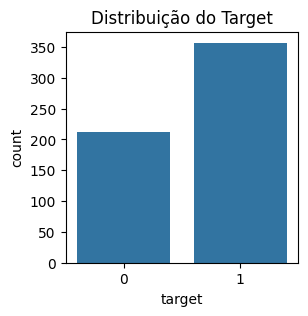

In [ ]:
plt_y = pd.DataFrame(y)
plt.figure(figsize=(3,3))
sns.countplot(data=plt_y, x='target')
plt.title('Distribuição do Target')
plt.show()

In [ ]:
result = []

# Defini os tipos de transformação que irei aplicar
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'PolynomialFeatures': PolynomialFeatures(degree=2),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}

# Loop para tester com cada tipo de transformação
for scaler_name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('sampler', RandomUnderSampler()),
        ('classifier', LogisticRegression(max_iter=200))
    ])

    # Defini os parâmetros a serem testados e executar o GridSearch
    param_grid = {'classifier__C': [0.1, 1, 10]}
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)

    # Treinei o modelo e testei o desempenho
    grid_search.fit(x, y)
    result.append([scaler_name, grid_search.best_score_, grid_search.best_params_])

In [ ]:
result

[['MinMaxScaler', 0.9701599130569788, {'classifier__C': 1}],
 ['StandardScaler', 0.9789318428815401, {'classifier__C': 0.1}],
 ['PolynomialFeatures', 0.9631113181183046, {'classifier__C': 1}],
 ['PowerTransformer', 0.9736686849868033, {'classifier__C': 0.1}]]

In [ ]:
for i in result:
  print("\nDesempenho usando ", i[0])
  print("   Melhor combinação: ", i[1])
  print("   Melhores combinações de parâmetros, classifier__C:", i[2]['classifier__C'])


Desempenho usando  MinMaxScaler
   Melhor combinação:  0.9701599130569788
   Melhores combinações de parâmetros, classifier__C: 1

Desempenho usando  StandardScaler
   Melhor combinação:  0.9789318428815401
   Melhores combinações de parâmetros, classifier__C: 0.1

Desempenho usando  PolynomialFeatures
   Melhor combinação:  0.9631113181183046
   Melhores combinações de parâmetros, classifier__C: 1

Desempenho usando  PowerTransformer
   Melhor combinação:  0.9736686849868033
   Melhores combinações de parâmetros, classifier__C: 0.1
